In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics
from netCDF4 import Dataset

In [2]:
# field = {}
# grid = {}
from iosubdomains import Variable
path = '../../data/Nyles/plume_ref4/plume_ref4_%02i_hist.nc'
v=Variable(path, 'b')
b = v[:,0,13,13]
b.shape

(145,)

In [9]:
Variable(path, 'n')[:]

array([   0.,    3.,    6.,    9.,   12.,   15.,   18.,   21.,   24.,
         27.,   31.,   34.,   38.,   42.,   47.,   52.,   59.,   67.,
         76.,   86.,   93.,   98.,  103.,  107.,  112.,  119.,  128.,
        136.,  141.,  147.,  154.,  163.,  171.,  177.,  182.,  190.,
        200.,  208.,  213.,  218.,  225.,  235.,  243.,  249.,  253.,
        260.,  269.,  278.,  284.,  289.,  296.,  306.,  314.,  320.,
        325.,  333.,  343.,  351.,  357.,  363.,  372.,  383.,  389.,
        395.,  403.,  413.,  422.,  429.,  435.,  445.,  455.,  463.,
        470.,  479.,  490.,  499.,  506.,  514.,  524.,  534.,  542.,
        550.,  560.,  570.,  579.,  587.,  596.,  607.,  616.,  624.,
        634.,  645.,  654.,  663.,  673.,  684.,  693.,  701.,  712.,
        723.,  731.,  741.,  752.,  762.,  770.,  780.,  791.,  801.,
        810.,  821.,  831.,  841.,  850.,  861.,  872.,  881.,  891.,
        902.,  912.,  921.,  931.,  942.,  952.,  962.,  972.,  982.,
        992., 1002.,

include halo no need for that

Z convention (nz, ny, nx)

In [6]:
def velocity_interpolation(a, axis=-1):
    """
    velocity_interpolation(a, axis=-1)

    Linear interpolation for velocity in a staggered type C grid.
    Z-convention (nz, ny, nx)

    Parameters
    ----------
    a : array_like
        Input array
    axis : int, optional
        The axis along which the difference is taken, default is the
        last axis.

    Returns
    -------
    U_interp : ndarray
        Array with same dimension as input.
    """
    nd = len(a.shape)

    # adding one extra dimension to field at the lower boundary with
    # zeros.
    a_shape = list(a.shape)
    a_shape[axis] = a.shape[axis] + 1
    a_shape = tuple(a_shape)
    slice0 = [slice(None)] * nd
    slice0[axis] = slice(1, None)
    slice0 = tuple(slice0)
    a_prim = np.zeros(a_shape)
    a_prim[slice0] = a

    # doing the interpolation
    slice1 = [slice(None)] * nd
    slice2 = [slice(None)] * nd
    slice1[axis] = slice(None, -1)
    slice2[axis] = slice(1, None)
    slice1 = tuple(slice1)
    slice2 = tuple(slice2)

    a_interp = (a_prim[slice1] + a_prim[slice2])/2
    return a_interp

In [10]:
v_interp = velocity_interpolation(v[:], axis=1)

Text(0.5, 1.0, 'Raw')

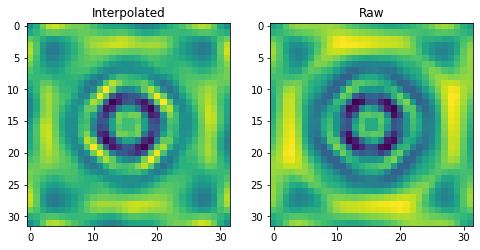

In [11]:
nz = 13
t = 96
plt.figure(figsize=(8,6))
plt.subplot(121)
im1 = plt.imshow(v_interp[t, nz, :,:])
#plt.colorbar(im1)
plt.title('Interpolated')

plt.subplot(122)
im2 = plt.imshow(v[t,nz,:,:])
plt.title('Raw')
#plt.colorbar(im2)

In [7]:
exp = diagnostics.plume('../../data/Nyles/plume_ref4/', 'plume_ref4')
exp.params

{'modelname': 'LES',
 'geometry': 'closed',
 'Lx': 4000.0,
 'Ly': 4000.0,
 'Lz': 2000.0,
 'n_tracers': 0,
 'unit_length': 'm',
 'unit_duration': 's',
 'rotating': True,
 'forced': True,
 'coriolis': 0.0001,
 'diff_coef': {},
 'datadir': '/home1/scratch/groullet/data/Nyles',
 'expname': 'plume_ref4',
 'mode': 'overwrite',
 'variables_in_history': ['b', 'u'],
 'timestep_history': 600.0,
 'simplified_grid': True,
 'include_halo': False,
 'disk_space_warning': 0.5,
 'show': False,
 'iterations_per_frame': 4,
 'style': 'b-interface',
 'stable_stratification': False,
 'aspect': 'equal',
 'rotation_speed': 3,
 'tend': 86400.0,
 'timestepping': 'LFAM3',
 'auto_dt': True,
 'dt': 200.0,
 'cfl': 0.8,
 'dt_max': 200.0,
 'global_nx': 32,
 'global_ny': 32,
 'global_nz': 16,
 'orderVF': 5,
 'orderKE': 5,
 'orderA': 5,
 'npx': 2,
 'npy': 2,
 'npz': 1,
 'nh': 3,
 'npre': 3,
 'npost': 3,
 'ndeepest': 20,
 'omega': 0.8,
 'tol': 0.001,
 'maxite': 20,
 'nglue': 1,
 'ncellscoarsest': 32,
 'nx': 16,
 'ny': 1

In [8]:
exp.template

'../../data/Nyles/plume_ref4/plume_ref4_%02i_hist.nc'

In [9]:
variables = exp.read_vars(['b'], 'dummy')

NameError: name 'nc' is not defined

In [25]:
variables.keys()

dict_keys(['b'])

In [7]:
npx = exp.params['npx']
npy = exp.params['npy']
npz = exp.params['npz']
number_domains = npx*npy*npz

In [8]:
number_domains

16

3 0


KeyError: 'x'

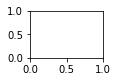

In [15]:
t = 140
x0 = 2000
y0 = 2000
path = '../../data/Nyles/plume_ref8/plume_ref4_00_hist.nc'

for i in range(0, number_domains):
    k = (i+2)%16 + 1
    print(k, i)
    
    variables = exp.read_vars(['x', 'y', 'b'], f'../../data/Nyles/plume_ref8/plume_ref8_{i:02d}_hist.nc')
    ax = plt.subplot(4,4,k)
    XX, YY = np.meshgrid(variables['x'], variables['y'])
    ax.pcolormesh(XX, YY, variables['b'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

In [5]:



for i in range(0,1):
    path = f'../../data/Nyles/plume_ref8/plume_ref8_{i:02d}_hist.nc'
    variables = exp.read_vars(['x', 'y', 'b'], path)
    
#     with Dataset(path, 'r') as nc:
#         print(list(nc.variables))
#         print('NN' in nc.variables)
#         field[f'b_{i:01d}'] = nc['b'][:].data
#         grid[f'x_{i:01d}'] = nc['x'][:].data
#         grid[f'y_{i:01d}'] = nc['y'][:].data

['n', 't', 'x_b', 'y_b', 'z_b', 'x_u', 'y_u', 'z_u', 'x_v', 'y_v', 'z_v', 'x_w', 'y_w', 'z_w', 'x_vor_i', 'y_vor_i', 'z_vor_i', 'x_vor_j', 'y_vor_j', 'z_vor_j', 'x_vor_k', 'y_vor_k', 'z_vor_k', 'b', 'u', 'v', 'w']
False


IndexError: x not found in /